In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con=sqlite3.connect(r'C:\Users\getsd\Desktop\DA- Portfolios\Amazon-Dataset/database.sqlite')

In [4]:
type(con)

sqlite3.Connection

In [5]:
df=pd.read_sql_query('SELECT * FROM REVIEWS', con)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.shape

(568454, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [11]:
filter1=df['HelpfulnessDenominator']>=df['HelpfulnessNumerator']
df_valid=df[filter1]
df_valid.shape

(568452, 10)

In [12]:
df_valid.duplicated(['UserId','ProfileName','Time','Text']).sum()

174521

In [13]:
data=df_valid.drop_duplicates(['UserId','ProfileName','Time','Text'])
data.shape

(393931, 10)

In [14]:
data['Time']=pd.to_datetime(data['Time'],unit='s')
data.head()

C:\Users\getsd\AppData\Local\Temp\ipykernel_18200\3440858936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time']=pd.to_datetime(data['Time'],unit='s')


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [15]:
data.shape

(393931, 10)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393931 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      393931 non-null  int64         
 1   ProductId               393931 non-null  object        
 2   UserId                  393931 non-null  object        
 3   ProfileName             393931 non-null  object        
 4   HelpfulnessNumerator    393931 non-null  int64         
 5   HelpfulnessDenominator  393931 non-null  int64         
 6   Score                   393931 non-null  int64         
 7   Time                    393931 non-null  datetime64[ns]
 8   Summary                 393931 non-null  object        
 9   Text                    393931 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 33.1+ MB


In [18]:
recommended_df=data.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values('ProductId', ascending=False)
recommended_df.head()

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211


<BarContainer object of 10 artists>

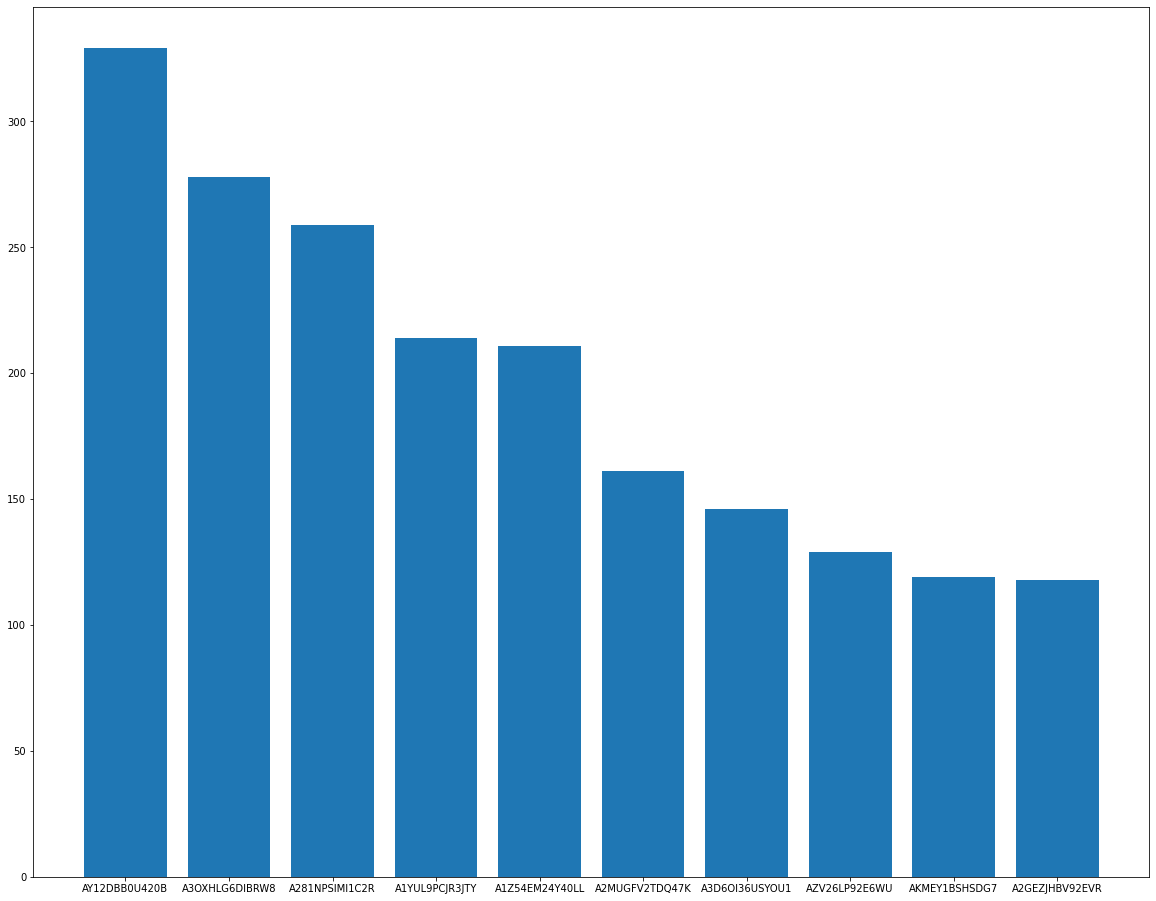

In [19]:
plt.figure(figsize=(20,16))
plt.bar(recommended_df.index[0:10], recommended_df['ProductId'][0:10].values)

In [26]:
products=data.groupby('ProductId').agg({'Score':'mean','ProductId':'count'})
products.head()

,Score,ProductId
ProductId,,
0006641040,4.351351,37
141278509X,5.000000,1
2734888454,3.500000,2
2841233731,5.000000,1
7800648702,4.000000,2


In [30]:
products.columns=['Avg_score','Count']
products.head()

,Avg_score,Count
ProductId,,
0006641040,4.351351,37
141278509X,5.000000,1
2734888454,3.500000,2
2841233731,5.000000,1
7800648702,4.000000,2


In [33]:
products[products['Count']>=500].sort_values('Count',ascending=False)

,Avg_score,Count
ProductId,,
B007JFMH8M,4.582237,912
B002QWP89S,4.593651,630
B003B3OOPA,4.741158,622
B001EO5Q64,4.745583,566
B0013NUGDE,4.310036,558
B000KV61FC,3.411871,556
B000NMJWZO,4.881919,542
B000UBD88A,4.343173,542
B005K4Q37A,3.817006,541


<AxesSubplot:xlabel='ProductId', ylabel='Count'>

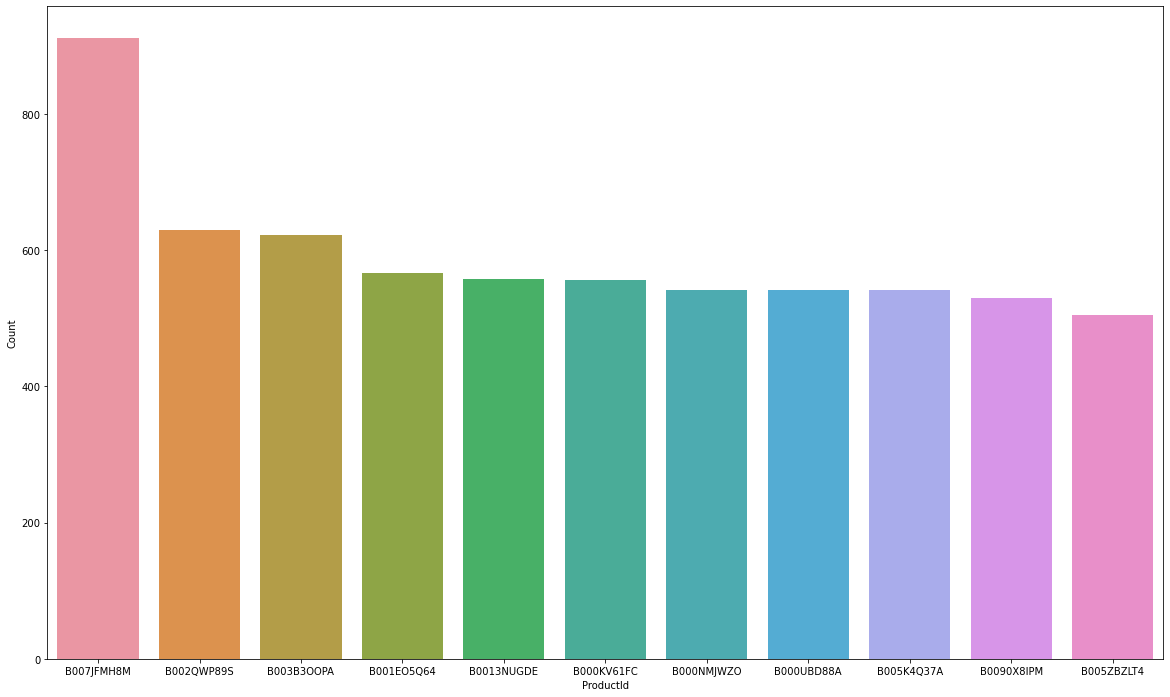

In [35]:
plt.figure(figsize=(20,12))
sns.barplot(x=products[products['Count']>=500].sort_values('Count',ascending=False).index, y=products[products['Count']>=500].sort_values('Count',ascending=False)['Count'])

In [36]:
x=data['UserId'].value_counts()
x.head()

AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
Name: UserId, dtype: int64

In [38]:
data['Viewer_type']=data['UserId'].apply(lambda user: 'Frequent' if x[user]>50 else 'Not Frequent')
data

C:\Users\getsd\AppData\Local\Temp\ipykernel_18200\804907843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Viewer_type']=data['UserId'].apply(lambda user: 'Frequent' if x[user]>50 else 'Not Frequent')


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent


In [40]:
freq_df=data[data['Viewer_type']=='Frequent']
freq_df['Score'].value_counts()

5    5765
4    1979
3     897
2     368
1     349
Name: Score, dtype: int64

<AxesSubplot:>

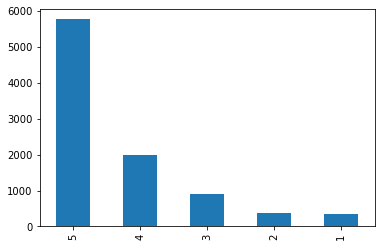

In [41]:
freq_df['Score'].value_counts().plot(kind='bar')

In [57]:
freq_df['text_length']=freq_df['Text'].apply(lambda x:len(x.split()))
freq_df.head()

C:\Users\getsd\AppData\Local\Temp\ipykernel_18200\3067092281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_df['text_length']=freq_df['Text'].apply(lambda x:len(x.split()))


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_type,text_length
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,2010-03-12,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,Frequent,22
44,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,2008-05-02,Great taste and convenience,We really like the McCann's steel cut oats but...,Frequent,44
46,47,B001EO5QW8,AQLL2R1PPR46X,grumpyrainbow,0,0,5,2007-10-19,good,Good oatmeal. I like the apple cinnamon the b...,Frequent,47
109,110,B001REEG6C,AY12DBB0U420B,Gary Peterson,0,0,5,2011-09-19,My Idea of a Good Diet Food.,I'm presently on a diet and I was at my Fresh ...,Frequent,133
141,142,B001GVISJW,A2YIO225BTKVPU,"Angel_Boy ""Treat the people around you the wa...",0,0,4,2011-04-03,Good Licorice,Twizzlers brand licorice is much better than t...,Frequent,47


In [58]:
text_df=freq_df[['ProductId','UserId','text_length']]
text_df

,ProductId,UserId,text_length
14,B001GVISJM,A2MUGFV2TDQ47K,22
44,B001EO5QW8,A2G7B7FKP2O2PU,44
46,B001EO5QW8,AQLL2R1PPR46X,47
109,B001REEG6C,AY12DBB0U420B,133
141,B001GVISJW,A2YIO225BTKVPU,47
...,...,...,...
568238,B002OXLXLG,A1Z54EM24Y40LL,110
568261,B00374ZKQ0,A2GEZJHBV92EVR,49
568317,B0013Z0PTW,A1ODOGXEYECQQ8,62
568331,B001BOAOLY,A36MP37DITBU6F,59


In [59]:
grouped_text=text_df.groupby('UserId').agg({'text_length':'mean'})
grouped_text

,text_length
UserId,
A1080SE9X3ECK0,36.830769
A11ED8O95W2103,105.622642
A132ETQPMHQ585,41.015873
A16WPA6JV83YXT,104.849057
A175N19FS2B4J,131.611111
...,...
AXO4PQU0XG3TG,80.842105
AY12DBB0U420B,149.559271
AY1EF0GOH80EK,147.186916


<AxesSubplot:>

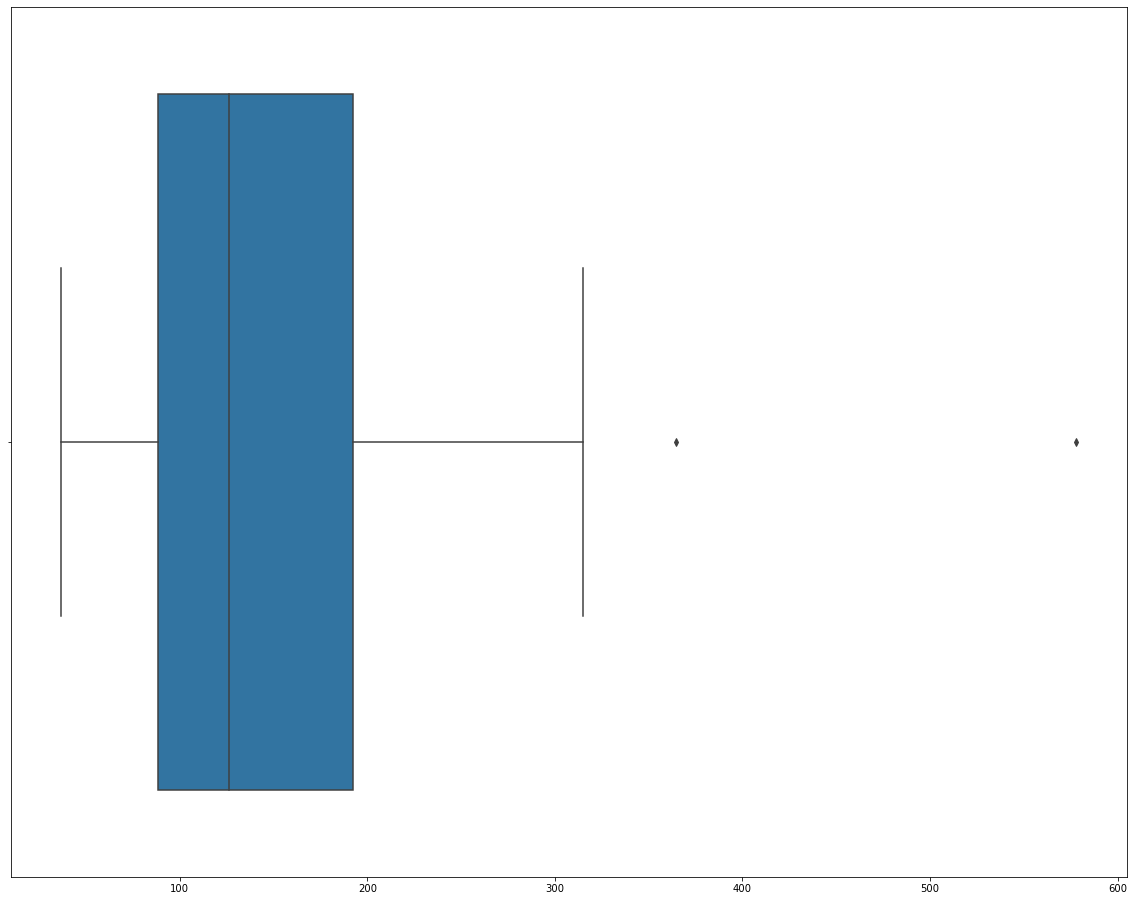

In [60]:
plt.figure(figsize=(20,16))
sns.boxplot(x=grouped_text.values)

In [61]:
grouped_text.sort_values('text_length',ascending=False)

,text_length
UserId,
A2A1XYSB692L6J,577.835443
A1Z4LX3Q1YMF84,364.309524
A37MH7ICH80QOX,314.745098
ATJN4KEHJBOC8,295.133333
AQ52JX9ES6XYY,278.529412
...,...
AAUICTIUBVU7R,51.746032
AJB5P7GVR0MT8,45.033333
A132ETQPMHQ585,41.015873
